In [198]:
# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'gulim'
import warnings
# FutureWarning을 무시
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
# use_inf_as_na 경고 무시
pd.set_option('mode.use_inf_as_na', False)

import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_a = pd.read_csv('samadult.csv')
df_a = df_a[['SEX','AGE_P','R_MARITL','DIBEV1','HYPEV','PREGNOW','DEP_2','AFLHCA18','BMI',
            'AFLHC29_','AFLHC31_','AFLHC32_','AFLHC33_','SMKEV','ALC1YR','CHLEV','VIGNO',
            'AUSUALPL','ASICNHC','HIT1A']]
df_a.columns

Index(['SEX', 'AGE_P', 'R_MARITL', 'DIBEV1', 'HYPEV', 'PREGNOW', 'DEP_2',
       'AFLHCA18', 'BMI', 'AFLHC29_', 'AFLHC31_', 'AFLHC32_', 'AFLHC33_',
       'SMKEV', 'ALC1YR', 'CHLEV', 'VIGNO', 'AUSUALPL', 'ASICNHC', 'HIT1A'],
      dtype='object')

In [2]:
df_a.isnull().sum()

SEX             0
AGE_P           0
R_MARITL        0
DIBEV1          0
HYPEV           0
PREGNOW     19300
DEP_2           0
AFLHCA18    14543
BMI             0
AFLHC29_    14543
AFLHC31_    14543
AFLHC32_    14543
AFLHC33_    14543
SMKEV           0
ALC1YR          0
CHLEV           0
VIGNO           0
AUSUALPL        0
ASICNHC         0
HIT1A           0
dtype: int64

In [3]:
df_a = df_a.fillna(0)

In [232]:
# 당뇨병인 사람만
df_o_1 = df_a[(df_a['AGE_P'] >= 18) & (df_a['AGE_P'] <= 34)] # 청년 18 ~ 34세
df_o_1 = df_o_1[df_o_1['DIBEV1'] == 1] # 청년 18 ~ 34세 당뇨병 있음

df_o_2 = df_a[(df_a['AGE_P'] >= 35) & (df_a['AGE_P'] <= 49)] # 중년 35 ~ 49세
df_o_2 = df_o_2[df_o_2['DIBEV1'] == 1] # 중년 35 ~ 49세 당뇨병 있음

df_o_3 = df_a[(df_a['AGE_P'] >= 50) & (df_a['AGE_P'] <= 64)] # 장년 50 ~ 64세
df_o_3 = df_o_3[df_o_3['DIBEV1'] == 1] # 장년 50 ~ 64세 당뇨병 있음

df_o_4 = df_a[df_a['AGE_P'] >= 65] # 노년 65세 이상
df_o_4 = df_o_4[df_o_4['DIBEV1'] == 1] # 노년 65세 이상 당뇨병 있음

df_o_list = [df_o_1, df_o_2, df_o_3, df_o_4]

In [237]:
(df_o_1['DIBEV1'] == 1).sum()

108

In [241]:
dibev_age = []
age = ['18~34','35~49','50~64','65~']
for i in df_o_list:
    dibev_age.append((i['DIBEV1'] == 1).sum())
    
df_age = pd.DataFrame(list(zip(dibev_age, age)), columns=['age_sum', 'age'])
df_age

,age_sum,age
0,108,18~34
1,363,35~49
2,930,50~64
3,1534,65~


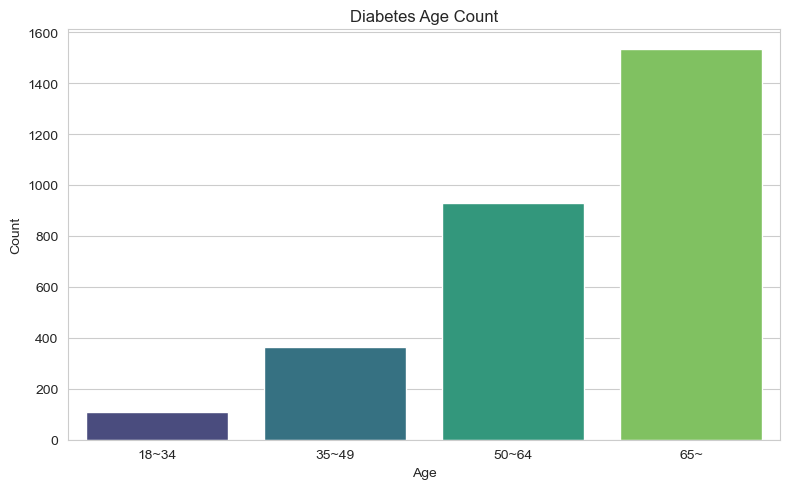

In [251]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

sns.barplot(data=df_age, x='age', y='age_sum', palette='viridis')

plt.title('Diabetes Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('diabetes_age_count.png')
plt.show()

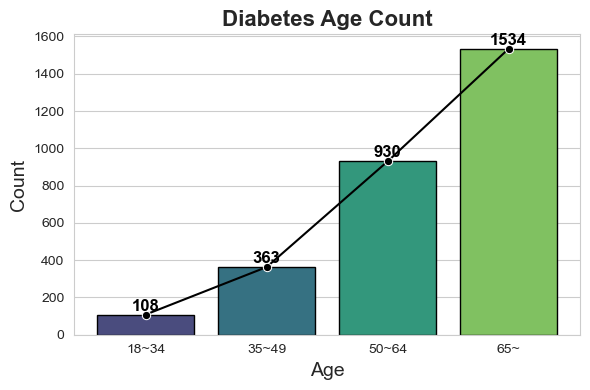

In [270]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")

# 그래프 스타일 조정
sns.barplot(data=df_age, x='age', y='age_sum', palette='viridis', edgecolor='black')
sns.lineplot(data=df_age, x='age', y='age_sum', marker='o', color='#000000')

plt.title('Diabetes Age Count', fontsize=16, fontweight='bold')  # 그래프 제목 스타일 조정
plt.xlabel('Age', fontsize=14)  # x축 레이블 스타일 조정
plt.ylabel('Count', fontsize=14)  # y축 레이블 스타일 조정

# 그래프 위에 선 추가
for idx, value in enumerate(df_age['age_sum']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
# plt.savefig('diabetes_age_count3.png')
plt.show()
# 나이가 많을수록 당뇨병 환자 수가 많아짐

In [17]:
# 당뇨병 아닌 사람만
df_x_1 = df_a[(df_a['AGE_P'] >= 18) & (df_a['AGE_P'] <= 34)] # 청년 18 ~ 34세
df_x_1 = df_x_1[df_x_1['DIBEV1'] == 2] # 청년 18 ~ 34세 당뇨병 없음

df_x_2 = df_a[(df_a['AGE_P'] >= 35) & (df_a['AGE_P'] <= 49)] # 중년 35 ~ 49세
df_x_2 = df_x_2[df_x_2['DIBEV1'] == 2] # 중년 35 ~ 49세 당뇨병 없음

df_x_3 = df_a[(df_a['AGE_P'] >= 50) & (df_a['AGE_P'] <= 64)] # 장년 50 ~ 64세
df_x_3 = df_x_3[df_x_3['DIBEV1'] == 2] # 장년 50 ~ 64세 당뇨병 없음

df_x_4 = df_a[df_a['AGE_P'] >= 65] # 노년 65세 이상
df_x_4 = df_x_4[df_x_4['DIBEV1'] == 2] # 노년 65세 이상 당뇨병 없음

# df_x_list = [df_x_1, df_x_2, df_x_3, df_x_4]

In [5]:
sorted(df_a_1['AGE_P'].unique())

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

In [6]:
df_a_1['AGE_P'].value_counts()

AGE_P
31    12
33    12
34    10
29    10
25     8
32     7
30     7
21     6
23     6
28     6
20     6
27     5
26     4
24     3
18     2
22     2
19     2
Name: count, dtype: int64

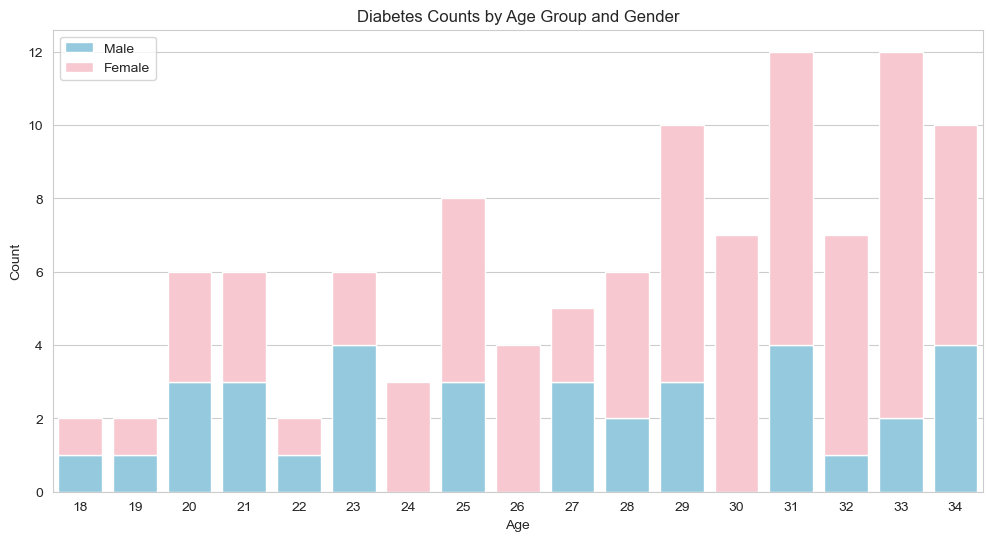

In [8]:
sns.set_style("whitegrid")

# AGE_P 별로 당뇨병 빈도 계산
age_diabetes_counts = df_a_1.groupby(['AGE_P', 'SEX']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))

# 남자의 막대 그래프
sns.barplot(data=age_diabetes_counts, x=age_diabetes_counts.index, y=1, color='skyblue', label='Male')

# 여자의 막대 그래프
sns.barplot(data=age_diabetes_counts, x=age_diabetes_counts.index, y=2, color='pink', label='Female', bottom=age_diabetes_counts[1])

# 그래프에 제목과 레이블 추가
plt.title('Diabetes Counts by Age Group and Gender')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()
plt.show()

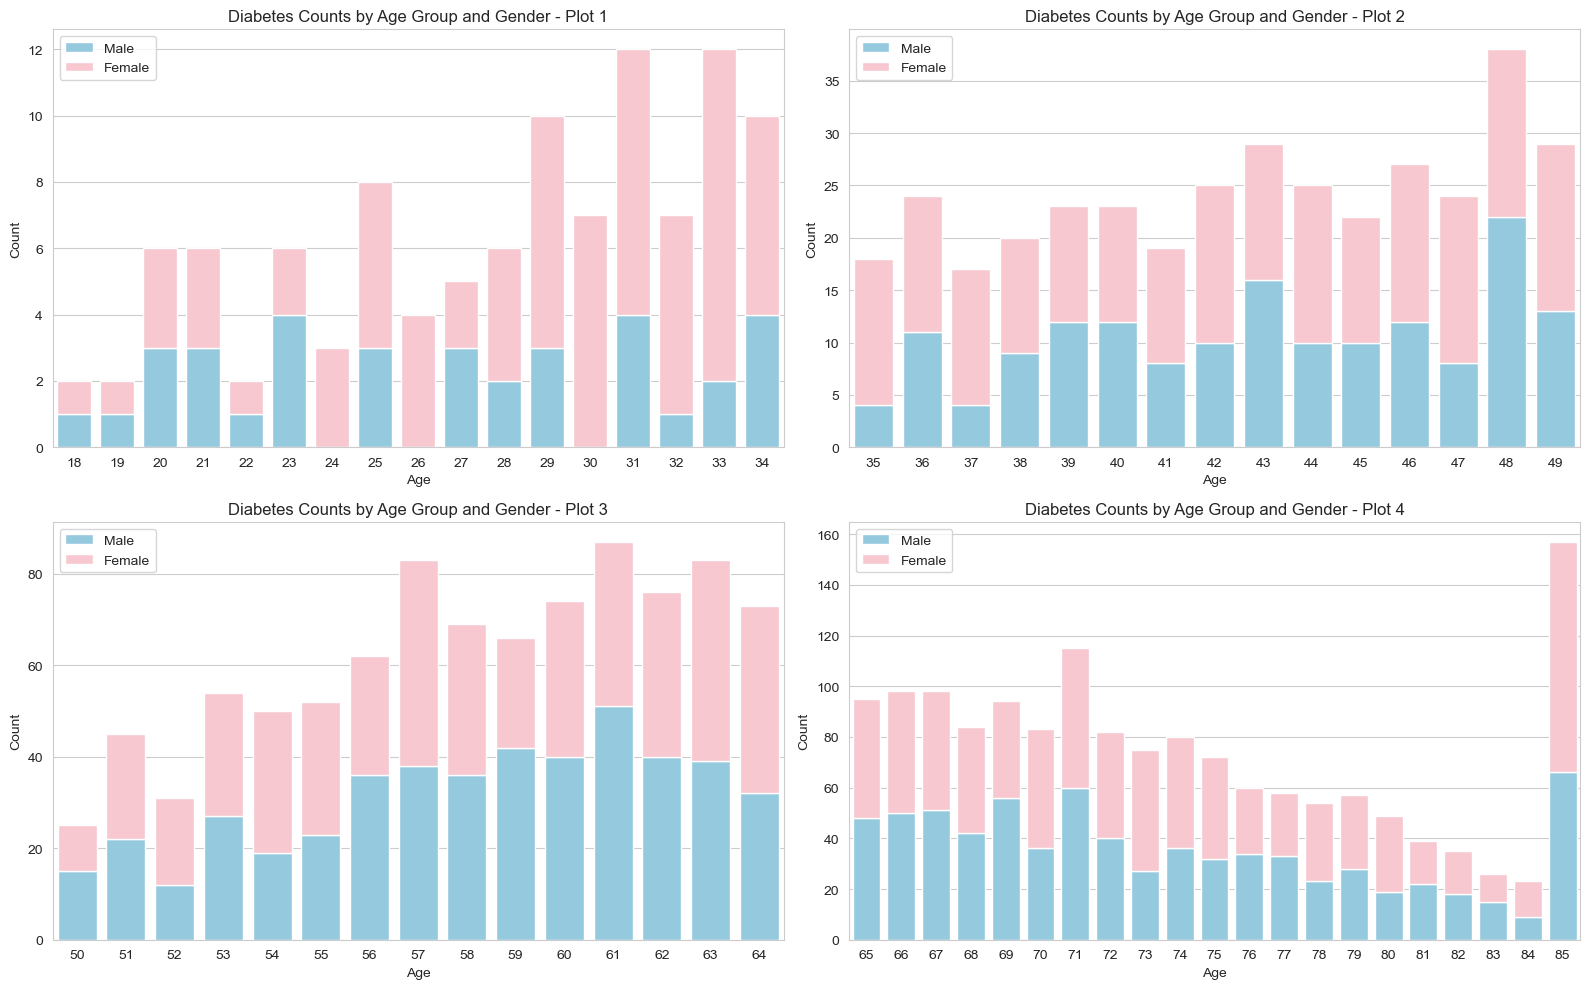

In [21]:
# 나이별 당뇨병 빈도 그래프

# 그래프를 2x2 그리드로 나타내기 위한 설정
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
df_o_list = [df_o_1, df_o_2, df_o_3, df_o_4]

for i, ax in enumerate(axes.flatten()):
    sns.set_style("whitegrid")

    # AGE_P 별로 당뇨병 빈도 계산
    age_diabetes_counts = df_o_list[i].groupby(['AGE_P', 'SEX']).size().unstack().fillna(0)

    # 남자의 막대 그래프
    sns.barplot(data=age_diabetes_counts, x=age_diabetes_counts.index, y=1, color='skyblue', label='Male', ax=ax)

    # 여자의 막대 그래프
    sns.barplot(data=age_diabetes_counts, x=age_diabetes_counts.index, y=2, color='pink', label='Female', bottom=age_diabetes_counts[1], ax=ax)

    # 그래프에 제목과 레이블 추가
    ax.set_title(f'Diabetes Counts by Age Group and Gender - Plot {i+1}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # 범례 추가
    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('diabetes_age_sex.png') # 사진 저장
plt.show()

In [83]:
# 임신한 사람 당요병 확인하기
# df_a_list = [df_a_1, df_a_2, df_a_3, df_a_4]
print((df_o_1['PREGNOW'] == 1).sum())
print((df_o_2['PREGNOW'] == 1).sum())
print((df_o_3['PREGNOW'] == 1).sum())
print((df_o_4['PREGNOW'] == 1).sum())
print('-' * 15)
print((df_x_1['PREGNOW'] == 1).sum())
print((df_x_2['PREGNOW'] == 1).sum())
print((df_x_3['PREGNOW'] == 1).sum())
print((df_x_4['PREGNOW'] == 1).sum())

4
6
0
0
---------------
140
26
0
0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


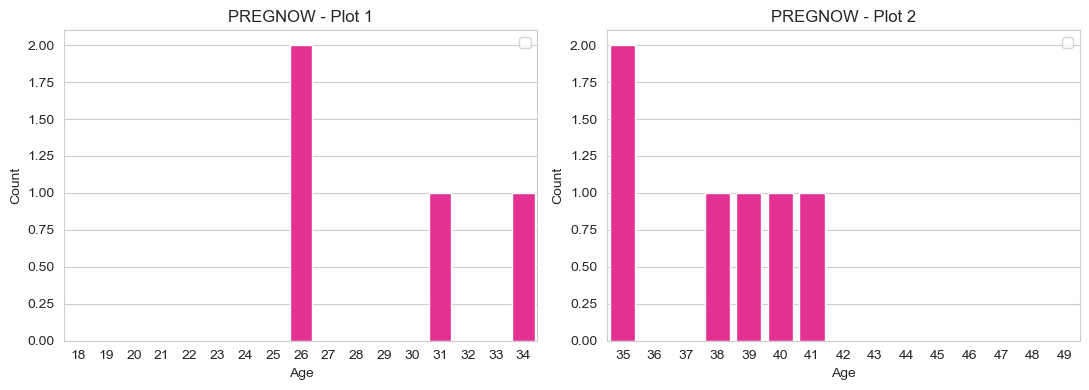

In [75]:
# 현재 당뇨병 임신여부(여자만)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
df_o_list = [df_o_1, df_o_2]

for i, ax in enumerate(axes.flatten()):
    sns.set_style("whitegrid")

    # AGE_P 별로 당뇨병 빈도 계산
    age_diabetes_counts = df_o_list[i].groupby(['AGE_P', 'PREGNOW']).size().unstack().fillna(0)

    # 남자의 막대 그래프
    sns.barplot(data=age_diabetes_counts, x=age_diabetes_counts.index, y=1, color='#FF1493', ax=ax)

    # 그래프에 제목과 레이블 추가
    ax.set_title(f'PREGNOW - Plot {i+1}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # 범례 추가
    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('diabetes_pregnow.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


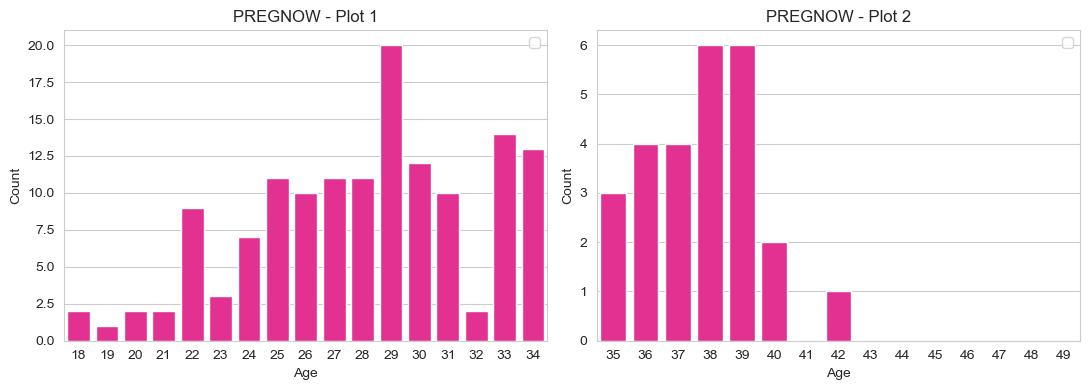

In [84]:
# 현재 당뇨병 아닌 임신여부(여자만)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
df_x_list = [df_x_1, df_x_2]

for i, ax in enumerate(axes.flatten()):
    sns.set_style("whitegrid")

    # AGE_P 별로 당뇨병 빈도 계산
    age_diabetes_counts = df_x_list[i].groupby(['AGE_P', 'PREGNOW']).size().unstack().fillna(0)

    # 남자의 막대 그래프
    sns.barplot(data=age_diabetes_counts, x=age_diabetes_counts.index, y=1, color='#FF1493', ax=ax)

    # 그래프에 제목과 레이블 추가
    ax.set_title(f'PREGNOW - Plot {i+1}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # 범례 추가
    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('not_diabetes_pregnow.png')
plt.show()

In [12]:
df_a_1['BMI']

502      4198
728      3347
798      2261
989      2653
1069     5121
         ... 
24498    4070
24648    3069
24743    2585
24753    4254
25382    2193
Name: BMI, Length: 108, dtype: int64

In [24]:
# 세계보건기구 비만의 정의
bmi_0 = df_o_1[df_o_1['BMI'] < 1850] # 저체중
bmi_1 = df_o_1[(df_o_1['BMI'] >= 1850) & (df_o_1['BMI'] <= 2499)] # 정상 범위
bmi_2 = df_o_1[(df_o_1['BMI'] >= 2500) & (df_o_1['BMI'] < 3000)] # 과체중 (비만 전 단계)
bmi_3 = df_o_1[(df_o_1['BMI'] >= 3000) & (df_o_1['BMI'] <= 3499)] # 비만(보통)
bmi_4 = df_o_1[(df_o_1['BMI'] >= 3500) & (df_o_1['BMI'] <= 3999)] # 비만(위험)
bmi_5 = df_o_1[df_o_1['BMI'] > 4000] # 비만(위험)

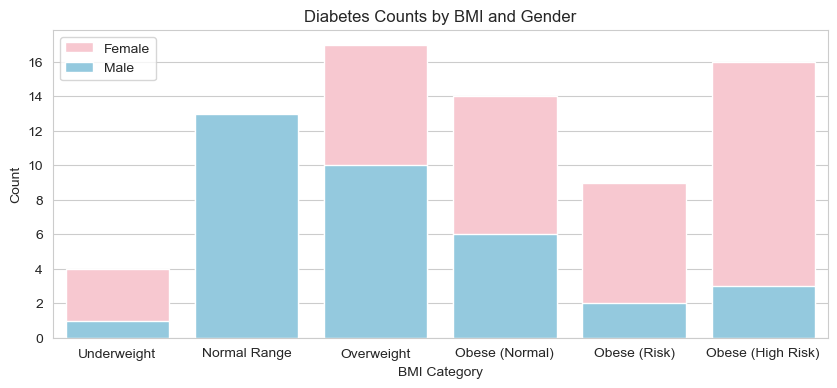

In [25]:
df_a_list = [df_a_1, df_a_2, df_a_3, df_a_4]
sns.set_style("whitegrid")

# BMI 범위 정의
bmi_0 = df_o_1[df_o_1['BMI'] < 1850] # 저체중
bmi_1 = df_o_1[(df_o_1['BMI'] >= 1850) & (df_o_1['BMI'] <= 2499)] # 정상 범위
bmi_2 = df_o_1[(df_o_1['BMI'] >= 2500) & (df_o_1['BMI'] < 3000)] # 과체중 (비만 전 단계)
bmi_3 = df_o_1[(df_o_1['BMI'] >= 3000) & (df_o_1['BMI'] <= 3499)] # 비만(보통)
bmi_4 = df_o_1[(df_o_1['BMI'] >= 3500) & (df_o_1['BMI'] <= 3999)] # 비만(위험)
bmi_5 = df_o_1[df_o_1['BMI'] > 4000] # 비만(위험)

bmi_ranges = [
    ('Underweight', bmi_0),
    ('Normal Range', bmi_1),
    ('Overweight', bmi_2),
    ('Obese (Normal)', bmi_3),
    ('Obese (Risk)', bmi_4),
    ('Obese (High Risk)', bmi_5)
]

# Create a new column 'BMI_Category' in df_a_1
df_o_1['BMI_Category'] = pd.cut(df_o_1['BMI'], bins=[-float('inf'), 1850, 2499, 2999, 3499, 3999, float('inf')],
                                labels=['Underweight', 'Normal Range', 'Overweight', 'Obese (Normal)', 'Obese (Risk)', 'Obese (High Risk)'])

# BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
df_bmi_counts = df_o_1.groupby(['BMI_Category', 'SEX']).size().unstack().reset_index()

plt.figure(figsize=(10, 4))

# 남성과 여성의 당뇨병 발병 횟수를 따로 그림
sns.barplot(data=df_bmi_counts, x='BMI_Category', y=2, color='pink', label='Female')
sns.barplot(data=df_bmi_counts, x='BMI_Category', y=1, color='skyblue', label='Male')

# 제목과 레이블 추가
plt.title('Diabetes Counts by BMI and Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')

plt.legend()
plt.show()

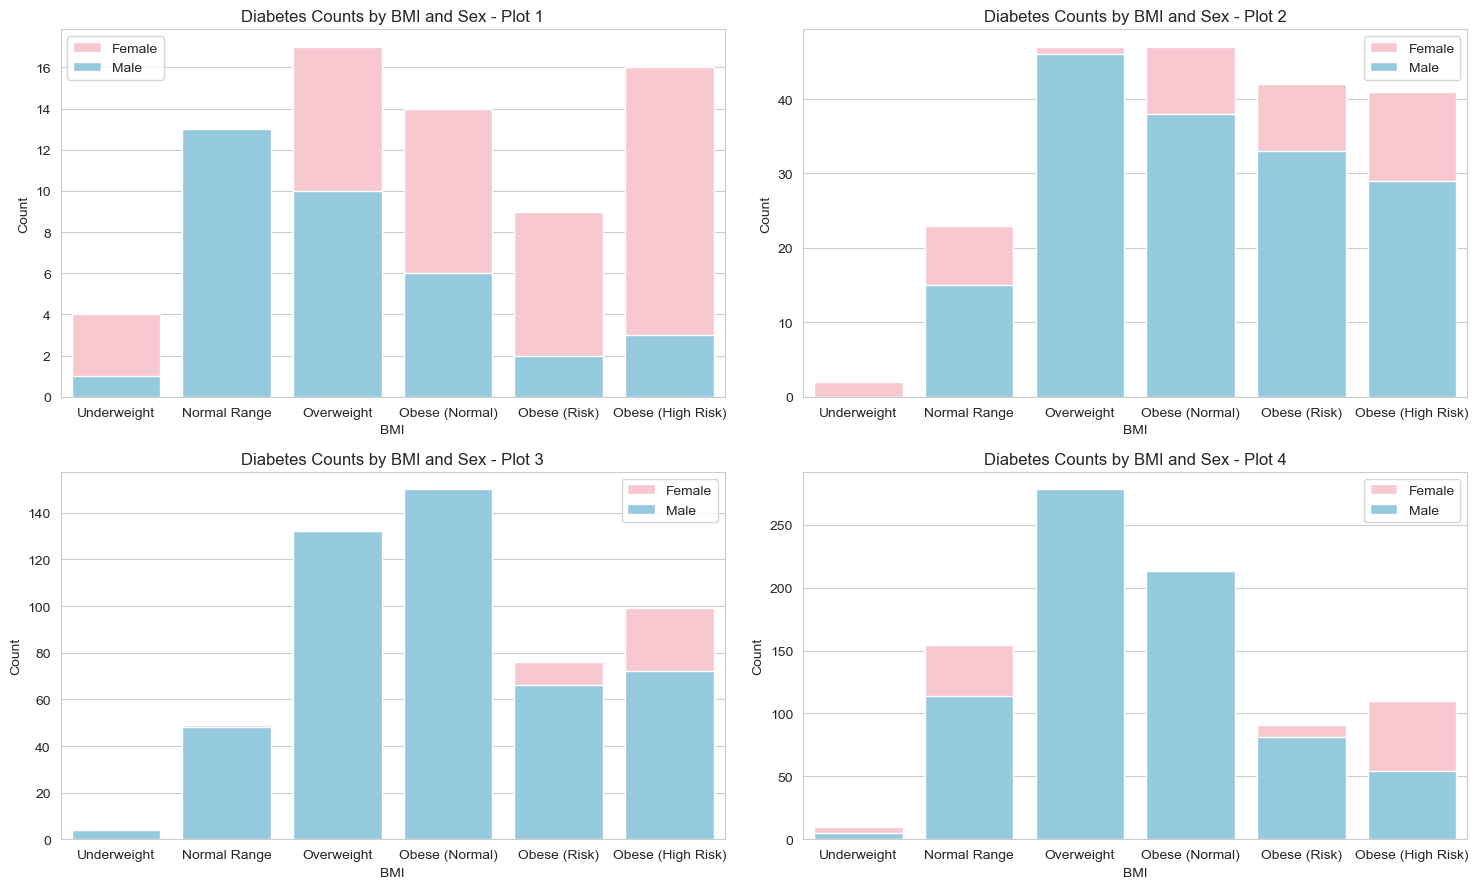

In [36]:
# 당뇨병인 사람들의 BMI
df_o_list = [df_o_1, df_o_2, df_o_3, df_o_4]
sns.set_style("whitegrid")

# BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성 및 플로팅
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

for i, ax in enumerate(axes.flatten()):
    # BMI 범위 정의
    bmi_0 = df_o_1[df_o_1['BMI'] < 1850] # 저체중
    bmi_1 = df_o_1[(df_o_1['BMI'] >= 1850) & (df_o_1['BMI'] <= 2499)] # 정상 범위
    bmi_2 = df_o_1[(df_o_1['BMI'] >= 2500) & (df_o_1['BMI'] <= 2999)] # 과체중 (비만 전 단계)
    bmi_3 = df_o_1[(df_o_1['BMI'] >= 3000) & (df_o_1['BMI'] <= 3499)] # 비만(보통)
    bmi_4 = df_o_1[(df_o_1['BMI'] >= 3500) & (df_o_1['BMI'] <= 3999)] # 비만(위험)
    bmi_5 = df_o_1[df_o_1['BMI'] > 4000] # 비만(위험)

    # BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
    df_o_list[i]['BMI_Category'] = pd.cut(df_o_list[i]['BMI'], bins=[-float('inf'), 1850, 2499, 2999, 3499, 3999, float('inf')],
                                        labels=['Underweight', 'Normal Range', 'Overweight', 'Obese (Normal)', 'Obese (Risk)', 'Obese (High Risk)'])

    df_bmi_counts = df_o_list[i].groupby(['BMI_Category', 'SEX']).size().unstack().reset_index()

    # 남성과 여성의 당뇨병 발병 횟수를 따로 그림
    sns.barplot(data=df_bmi_counts, x='BMI_Category', y=2, color='pink', label='Female', ax=ax)
    sns.barplot(data=df_bmi_counts, x='BMI_Category', y=1, color='skyblue', label='Male', ax=ax)

    # 제목과 레이블 추가
    ax.set_title(f'Diabetes Counts by BMI and Sex - Plot {i+1}')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Count')

    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('diabetes_bmi_sex.png')
plt.show()

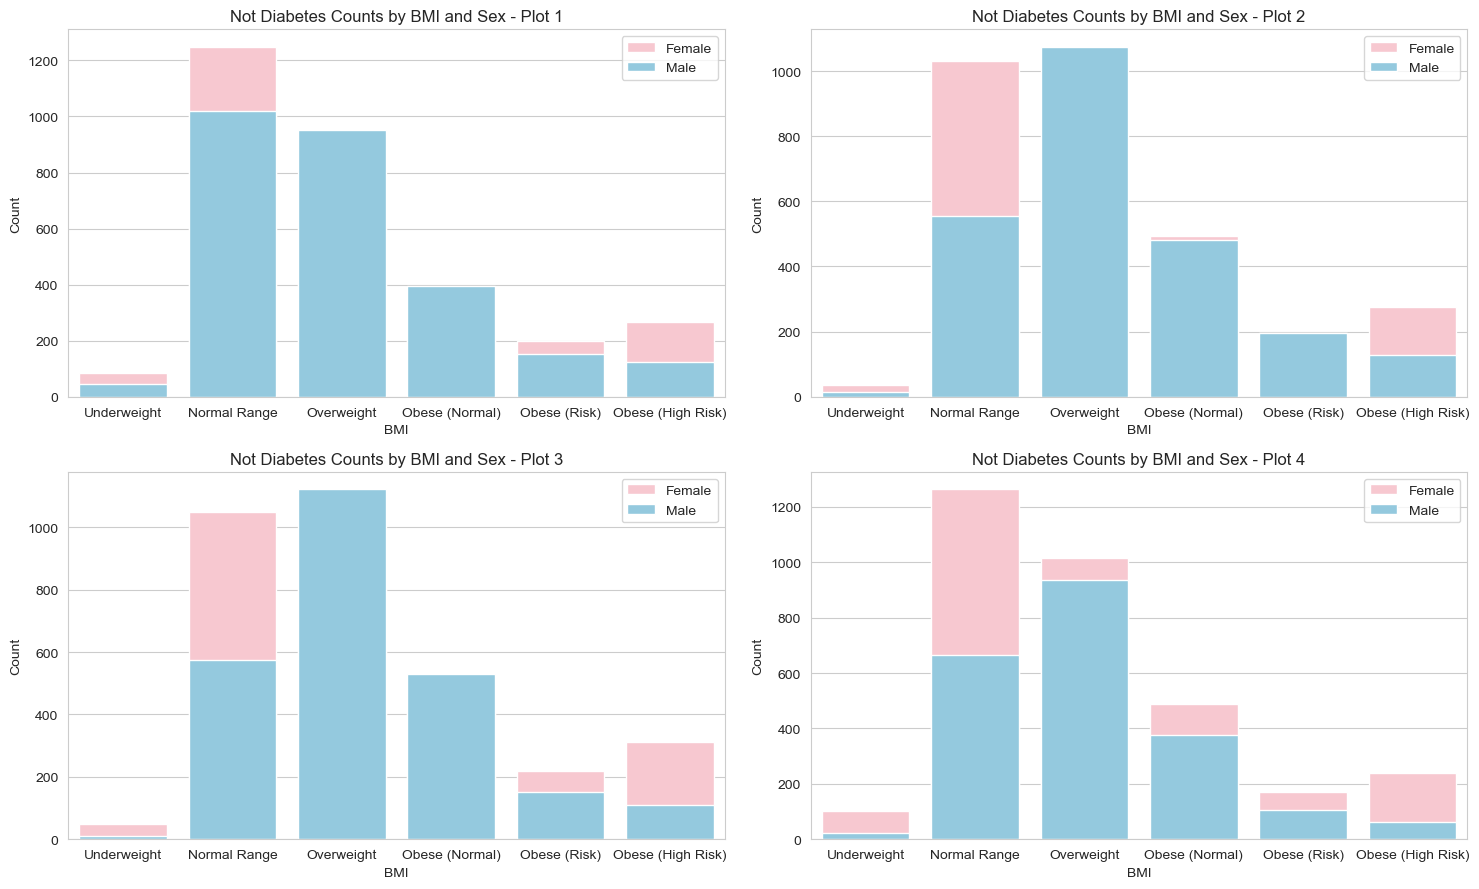

In [35]:
# 당뇨병이 아닌 사람의 BMI
df_x_list = [df_x_1, df_x_2, df_x_3, df_x_4]
sns.set_style("whitegrid")

# BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성 및 플로팅
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

for i, ax in enumerate(axes.flatten()):
    # BMI 범위 정의
    bmi_0 = df_x_list[i][df_x_list[i]['BMI'] < 1850]  # 저체중
    bmi_1 = df_x_list[i][(df_x_list[i]['BMI'] >= 1850) & (df_x_list[i]['BMI'] <= 2499)]  # 정상 범위
    bmi_2 = df_x_list[i][(df_x_list[i]['BMI'] >= 2500) & (df_x_list[i]['BMI'] <= 2999)]  # 과체중 (비만 전 단계)
    bmi_3 = df_x_list[i][(df_x_list[i]['BMI'] >= 3000) & (df_x_list[i]['BMI'] <= 3499)]  # 비만(보통)
    bmi_4 = df_x_list[i][(df_x_list[i]['BMI'] >= 3500) & (df_x_list[i]['BMI'] <= 3999)]  # 비만(위험)
    bmi_5 = df_x_list[i][df_x_list[i]['BMI'] >= 4000]  # 비만(위험)

    # BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
    df_x_list[i]['BMI_Category'] = pd.cut(df_x_list[i]['BMI'], bins=[-float('inf'), 1850, 2499, 2999, 3499, 3999, float('inf')],
                                        labels=['Underweight', 'Normal Range', 'Overweight', 'Obese (Normal)', 'Obese (Risk)', 'Obese (High Risk)'])

    df_bmi_counts = df_x_list[i].groupby(['BMI_Category', 'SEX']).size().unstack().reset_index()

    # 남성과 여성의 당뇨병 발병 횟수를 따로 그림
    sns.barplot(data=df_bmi_counts, x='BMI_Category', y=2, color='pink', label='Female', ax=ax)
    sns.barplot(data=df_bmi_counts, x='BMI_Category', y=1, color='skyblue', label='Male', ax=ax)

    # 제목과 레이블 추가
    ax.set_title(f'Not Diabetes Counts by BMI and Sex - Plot {i+1}')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Count')

    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('not_diabetes_bmi_sex.png')
plt.show()

In [30]:
df_o = df_a[df_a['DIBEV1'] == 1] # 당뇨병o
df_x = df_a[df_a['DIBEV1'] == 1] # 당뇨병x

In [41]:
# df_a['VIGNO'] >= 900
df_a.loc[df_a['VIGNO'] >= 900, 'VIGNO'] = 0

In [42]:
sorted(df_a['VIGNO'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 30,
 32,
 36,
 40,
 45,
 50,
 60,
 70,
 96,
 100,
 104,
 120,
 150,
 180,
 186,
 200,
 300]

In [ ]:
# 0, 996, 997, 998, 999 : 0 (없음)
# 1, 2, 3, 4, 5, 6, 7, 8 : 10회 미만
# 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 30, 30, 32, 36, 40, 45 : 10~49회
# 50, 60, 70, 96 : 50~99회
# 100, 104, 120, 150, 180, 186, 200, 300 : 100회 이상

In [63]:
vigno_0 = df_a[(df_a['VIGNO'] == 0)]
vigno_1 = df_a[(df_a['VIGNO'] >= 1) & (df_a['VIGNO'] > 10)]
vigno_40 = df_a[(df_a['VIGNO'] >= 10) & (df_a['VIGNO'] > 50)]
vigno_50 = df_a[(df_a['VIGNO'] >= 50) & (df_a['VIGNO'] > 100)]
vigno_100 = df_a[(df_a['VIGNO'] >= 100)]

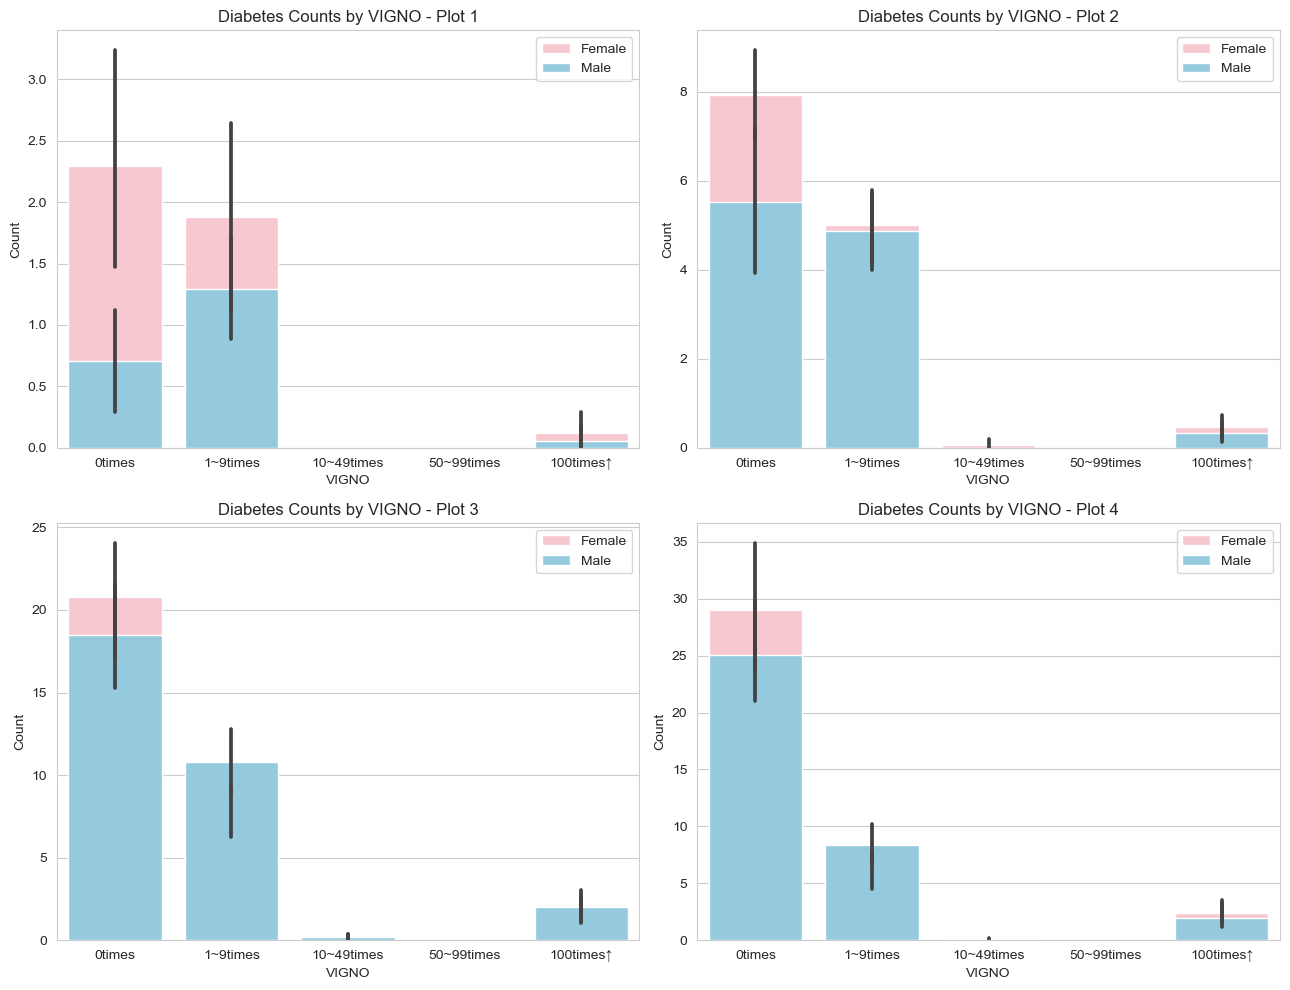

In [68]:
# 당뇨병인 사람들의 신체활동빈도
df_o_list = [df_o_1, df_o_2, df_o_3, df_o_4]

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

for i, ax in enumerate(axes.flatten()):
    # BMI 범위 정의
    vigno_0 = df_o_list[i][(df_o_list[i]['VIGNO'] == 0)]  # 0회
    vigno_1_10 = df_o_list[i][(df_o_list[i]['VIGNO'] >= 1) & (df_o_list[i]['VIGNO'] < 10)]  # 1~9회
    vigno_10_50 = df_o_list[i][(df_o_list[i]['VIGNO'] >= 10) & (df_o_list[i]['VIGNO'] < 50)]  # 10~49회
    vigno_50_100 = df_o_list[i][(df_o_list[i]['VIGNO'] >= 50) & (df_o_list[i]['VIGNO'] < 100)]  # 50~99회
    vigno_100 = df_o_list[i][(df_o_list[i]['VIGNO'] >= 100)]  # 100회 이상

    # BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
    df_o_list[i]['VIGNO_Category'] = pd.cut(df_o_list[i]['VIGNO'],
                                            bins=[-float('inf'), 0, 9, 49, 99, float('inf')],
                                            labels=['0times', '1~9times', '10~49times', '50~99times', '100times↑'])

    df_bmi_counts = df_o_list[i].groupby(['VIGNO_Category', 'AGE_P', 'SEX']).size().unstack().reset_index()

    # 남성과 여성의 당뇨병 발병 횟수를 따로 그림
    sns.barplot(data=df_bmi_counts, x='VIGNO_Category', y=2, color='pink', label='Female', ax=ax)
    sns.barplot(data=df_bmi_counts, x='VIGNO_Category', y=1, color='skyblue', label='Male', ax=ax)

    # 제목과 레이블 추가
    ax.set_title(f'Diabetes Counts by VIGNO - Plot {i + 1}')
    ax.set_xlabel('VIGNO')
    ax.set_ylabel('Count')

    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('diabetes_vigno.png')
plt.show()

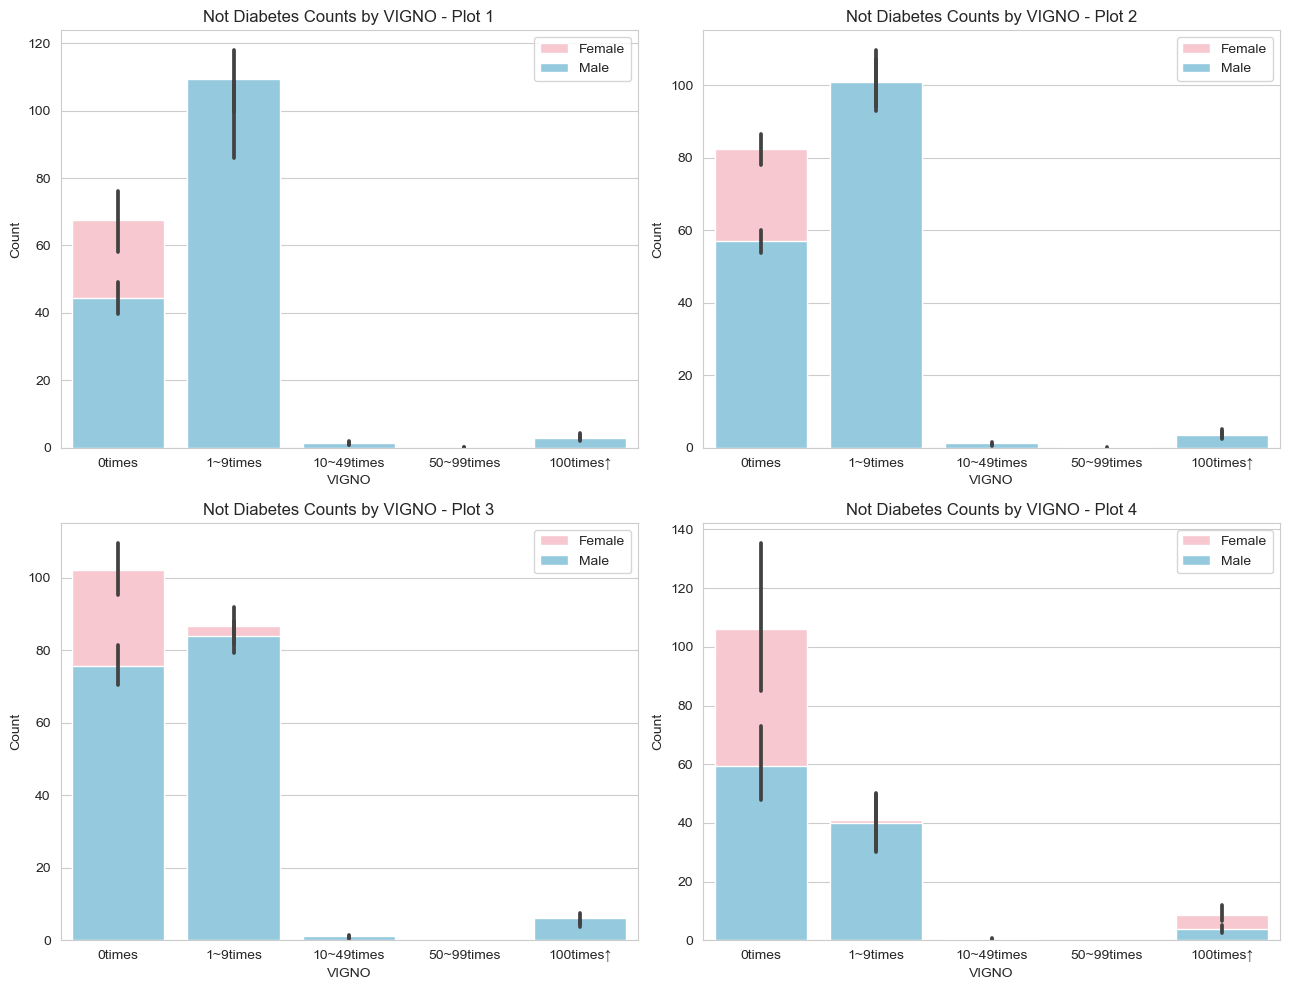

In [70]:
# 당뇨병 아닌 사람들의 신체활동빈도
df_x_list = [df_x_1, df_x_2, df_x_3, df_x_4]

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

for i, ax in enumerate(axes.flatten()):
    # BMI 범위 정의
    vigno_0 = df_x_list[i][(df_x_list[i]['VIGNO'] == 0)]  # 0회
    vigno_1_10 = df_x_list[i][(df_x_list[i]['VIGNO'] >= 1) & (df_x_list[i]['VIGNO'] < 10)]  # 1~9회
    vigno_10_50 = df_x_list[i][(df_x_list[i]['VIGNO'] >= 10) & (df_x_list[i]['VIGNO'] < 50)]  # 10~49회
    vigno_50_100 = df_x_list[i][(df_x_list[i]['VIGNO'] >= 50) & (df_x_list[i]['VIGNO'] < 100)]  # 50~99회
    vigno_100 = df_x_list[i][(df_x_list[i]['VIGNO'] >= 100)]  # 100회 이상

    # BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
    df_x_list[i]['VIGNO_Category'] = pd.cut(df_x_list[i]['VIGNO'],
                                            bins=[-float('inf'), 0, 9, 49, 99, float('inf')],
                                            labels=['0times', '1~9times', '10~49times', '50~99times', '100times↑'])

    df_bmi_counts = df_x_list[i].groupby(['VIGNO_Category', 'AGE_P', 'SEX']).size().unstack().reset_index()

    # 남성과 여성의 당뇨병 발병 횟수를 따로 그림
    sns.barplot(data=df_bmi_counts, x='VIGNO_Category', y=2, color='pink', label='Female', ax=ax)
    sns.barplot(data=df_bmi_counts, x='VIGNO_Category', y=1, color='skyblue', label='Male', ax=ax)

    # 제목과 레이블 추가
    ax.set_title(f'Not Diabetes Counts by VIGNO - Plot {i + 1}')
    ax.set_xlabel('VIGNO')
    ax.set_ylabel('Count')

    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('not_diabetes_vigno.png')
plt.show()

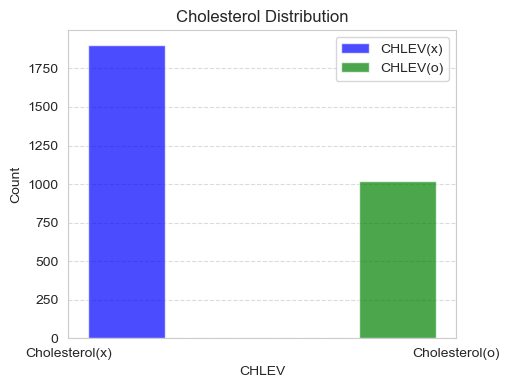

In [360]:
# 당뇨병 환자 - 고지혈증
d1 = df_o[df_o['CHLEV'] == 2]
d2 = df_o[df_o['CHLEV'] == 1]

plt.figure(figsize=(5, 4))

# 히스토그램 그리기
plt.hist([d2['CHLEV'], d1['CHLEV']], color=['blue', 'green'], label=['CHLEV(x)', 'CHLEV(o)'], bins=2, alpha=0.7)

# 타이틀 및 레이블 설정
plt.title('Cholesterol Distribution')
plt.xlabel('CHLEV')
plt.ylabel('Count')

# x축 눈금 설정
plt.xticks([2, 1], ['Cholesterol(o)', 'Cholesterol(x)'])

# 범례 위치 및 크기 설정
plt.legend(loc='upper right')

# 그래프 스타일 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
# plt.savefig('Cholesterol.png')
plt.show()

In [357]:
(df_o['ALC1YR'] == 1).sum()

1512

In [358]:
(df_o['ALC1YR'] == 2).sum()

1405

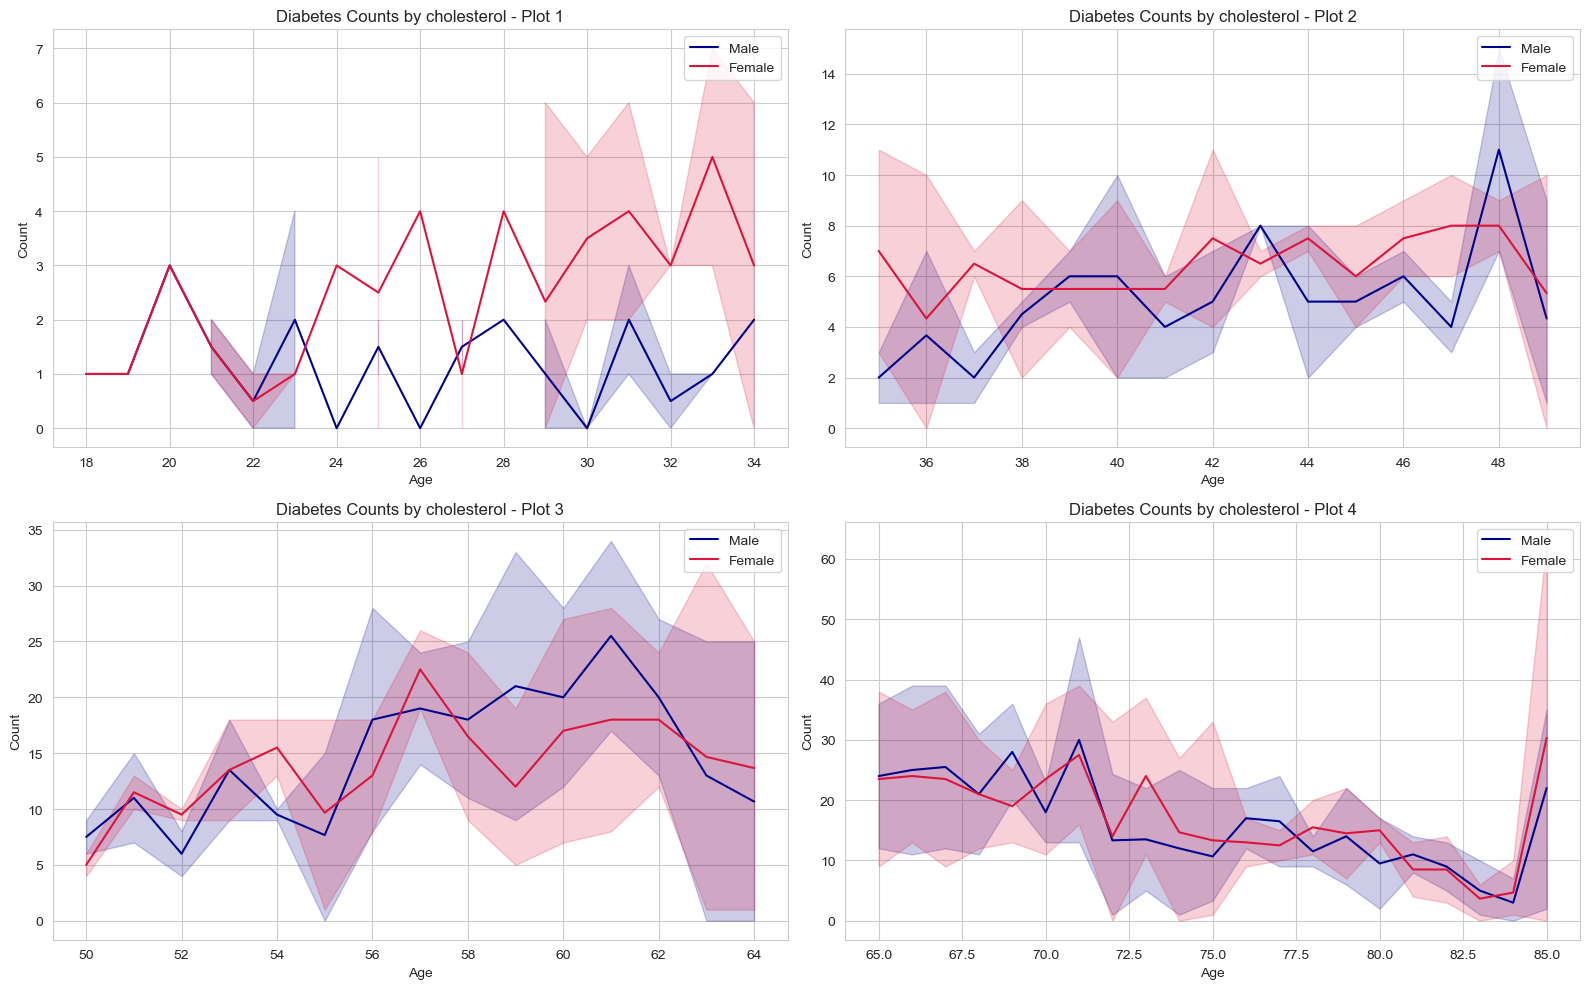

In [91]:
# 그래프를 2x2 그리드로 나타내기 위한 설정
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
df_o_list = [df_o_1, df_o_2, df_o_3, df_o_4]

for i, ax in enumerate(axes.flatten()):
    sns.set_style("whitegrid")

    # AGE_P 별로 당뇨병 빈도 계산
    age_diabetes_counts = df_o_list[i].groupby(['CHLEV', 'AGE_P', 'SEX']).size().unstack().fillna(0)

    # 남자의 선 그래프
    sns.lineplot(data=age_diabetes_counts, x='AGE_P', y=1, color='#00008B', label='Male', ax=ax)

    # 여자의 선 그래프
    sns.lineplot(data=age_diabetes_counts, x='AGE_P', y=2, color='#DC143C', label='Female', ax=ax)

    # 그래프에 제목과 레이블 추가
    ax.set_title(f'Diabetes Counts by cholesterol - Plot {i+1}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # 범례 추가
    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('diabetes_cholesterol.png') # 사진 저장
plt.show()

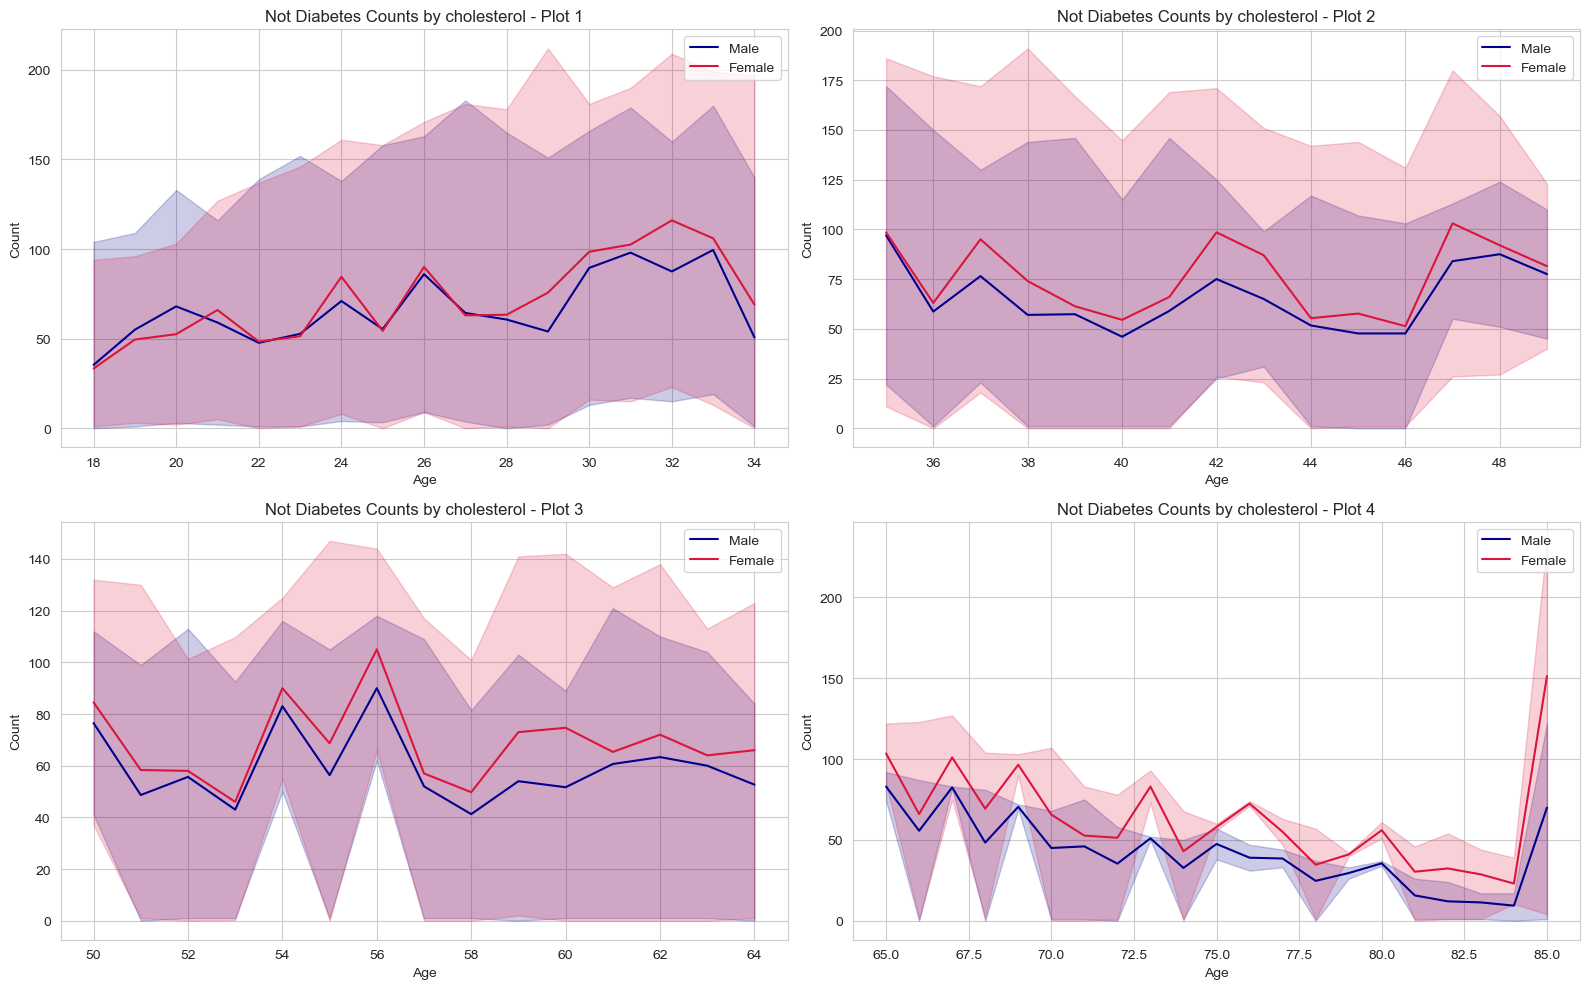

In [92]:
# 그래프를 2x2 그리드로 나타내기 위한 설정
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
df_x_list = [df_x_1, df_x_2, df_x_3, df_x_4]

for i, ax in enumerate(axes.flatten()):
    sns.set_style("whitegrid")

    # AGE_P 별로 당뇨병 빈도 계산
    age_diabetes_counts = df_x_list[i].groupby(['CHLEV', 'AGE_P', 'SEX']).size().unstack().fillna(0)

    # 남자의 선 그래프
    sns.lineplot(data=age_diabetes_counts, x='AGE_P', y=1, color='#00008B', label='Male', ax=ax)

    # 여자의 선 그래프
    sns.lineplot(data=age_diabetes_counts, x='AGE_P', y=2, color='#DC143C', label='Female', ax=ax)

    # 그래프에 제목과 레이블 추가
    ax.set_title(f'Not Diabetes Counts by cholesterol - Plot {i+1}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # 범례 추가
    ax.legend()

# 전체 그래프 표시
plt.tight_layout()
# plt.savefig('not_diabetes_cholesterol.png') # 사진 저장
plt.show()

In [ ]:
# 알콜


In [109]:
# 질병
df = pd.read_csv('samadult.csv')
df_d = df[['SEX','AGE_P','DIBEV1',
           'ANGEV','HRTEV','STREV','EPHEV','COPDEV','AASSTILL','ULCEV','CANEV','AHAYFYR',
           'SINYR','CBRCHYR','KIDWKYR','LIVYR','AFLHCA1','AFLHCA2','AFLHCA3',
           'ACHRC14A','ALCHRC15','ALCHRC22','ALCHRC23','ALCHRC24','ALCHRC25','ALCHRC26','ALCHRC27','ALCHRC28']]
df_d = df_d.fillna(0) # nan 값을 0으로 변경
df_d_o = df_d[df_d['DIBEV1'] == 1] # 당뇨병 o
df_d_x = df_d[df_d['DIBEV1'] == 2] # 당뇨병 x

In [154]:
df_list = ['ANGEV','HRTEV','STREV','EPHEV','COPDEV','AASSTILL','ULCEV','CANEV','AHAYFYR',
           'SINYR','CBRCHYR','KIDWKYR','LIVYR','AFLHCA1','AFLHCA2','AFLHCA3',
           'ACHRC14A','ALCHRC15','ALCHRC22','ALCHRC23','ALCHRC24','ALCHRC25','ALCHRC26','ALCHRC27','ALCHRC28']

# df_d_o['ANGEV'] = df_d_o['ANGEV'].apply(lambda x: 2 if x not in [1, 2] else x)
for column in df_list:
    df_d_o[column] = df_d_o[column].apply(lambda x: 2 if x not in [1, 2] else x)

In [155]:
(df_d_o['ANGEV'] == 2).sum()

2731

In [229]:
df_list = ['ANGEV','HRTEV','STREV','EPHEV','COPDEV','AASSTILL','ULCEV','CANEV','AHAYFYR',
           'SINYR','CBRCHYR','KIDWKYR','LIVYR','AFLHCA1','AFLHCA2','AFLHCA3',
           'ACHRC14A','ALCHRC15','ALCHRC22','ALCHRC23','ALCHRC24','ALCHRC25','ALCHRC26','ALCHRC27','ALCHRC28']

df_list_kor = ['협심증','심장병','뇌졸중','폐기종','만성폐쇄성폐질환','천식여부','궤양','암진단','건초열',
           '부비동염','만성기관지염','신장이약함','간질환','시력문제','청각장애','괸절염',
           '지적장애(정신지체)','발당장애(뇌성마비)','내분비/영양/대사','신경계/감각','소화기관','비뇨기','피부/피하계','혈액','악성종양/낭종']

df_list_eng = ["Extension", "Heart Disease", "Heart Stroke", "Extension", "Chronic obstructive pulmonary disease", 
               "Asthmatic", "Acute", "Cancer diagnosis", "Dry fever", "Sinusitis", "Chronic bronchitis", "Hepatic disease", 
               "Hepatic disease", "Deafness", "Deafness", "Centity", "Deafness", "Deafness", "Intellectual Disorder", 
               "Endocrine/Nutrition/Metabolism", "Nervous System/Sensory", "Dysenterology", "Skin/Subcutaneous", "Blood", "Diseptic Tumor/Cyst"]

df_sum = []
df_list_values = []

for i in df_list:
    d = (df_d_o[f'{i}'] == 1).sum()
    df_sum.append(d)
    df_list_values.append(i)

df_o1 = pd.DataFrame(list(zip(df_sum, df_list_values, df_list_eng)), columns=['df_sum', 'df_list', 'df_list_eng'])
df_o1

,df_sum,df_list,df_list_eng
0,204,ANGEV,Extension
1,555,HRTEV,Heart Disease
2,315,STREV,Heart Stroke
3,122,EPHEV,Extension
4,302,COPDEV,Chronic obstructive pulmonary disease
5,341,AASSTILL,Asthmatic
6,362,ULCEV,Acute
7,517,CANEV,Cancer diagnosis
8,265,AHAYFYR,Dry fever
9,475,SINYR,Sinusitis


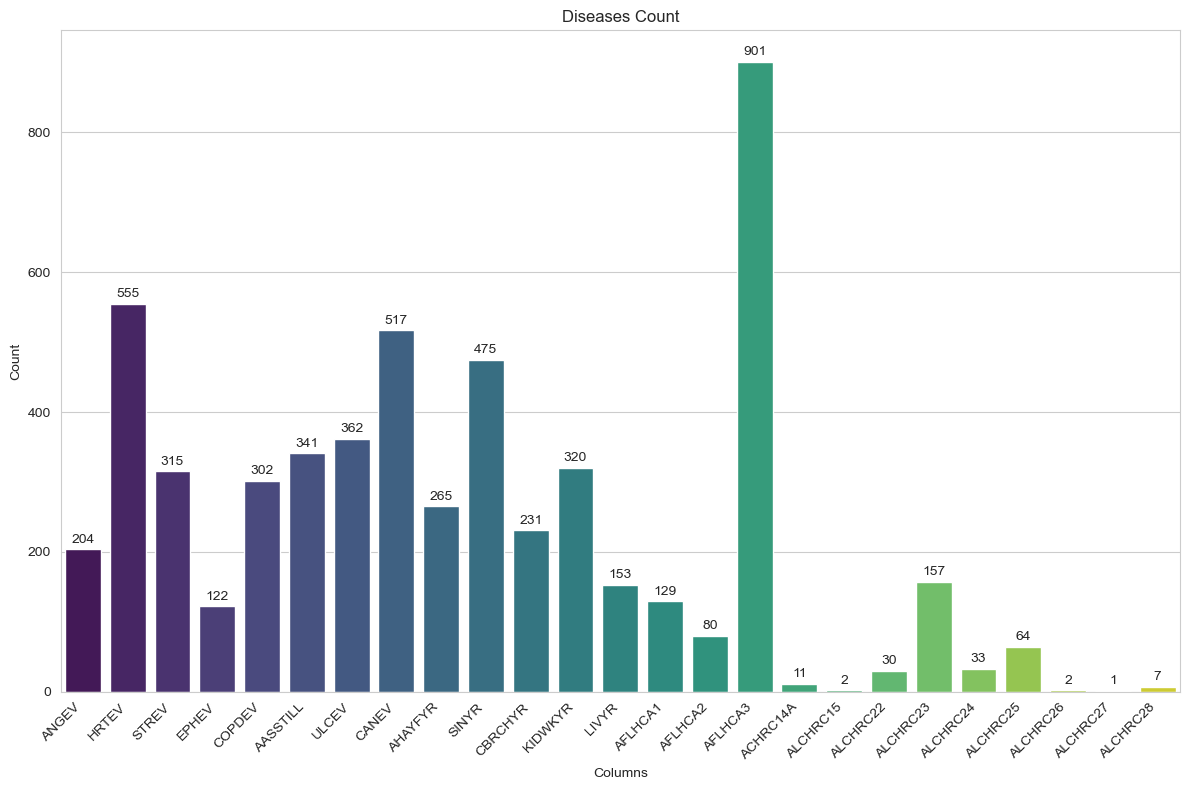

In [225]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Seaborn의 barplot 사용
sns.barplot(data=df_o1, x='df_list', y='df_sum', palette='viridis')

plt.title('Diseases Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 그래프 위에 표시되는 값 추가
for idx, value in enumerate(df_o1['df_sum']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
# plt.savefig('diseases_count.png')
plt.show()

In [271]:
# AFLHCA3 - 관절염
# HRTEV - 심장병
# CANEV - 암진단

In [280]:
df = pd.read_csv('samadult.csv')
df = df.fillna(0) # nan 값을 0으로 변경
d_o = df[df['DIBEV1'] == 1] # 당뇨병 o
d_o = df[['SEX','AGE_P','DIBEV1','BMI','AFLHCA3','HRTEV','CANEV']]

d_o_list = ['AFLHCA3','HRTEV','CANEV']
# df_d_o['ANGEV'] = df_d_o['ANGEV'].apply(lambda x: 2 if x not in [1, 2] else x)
for column in d_o_list:
    d_o[column] = d_o[column].apply(lambda x: 2 if x not in [1, 2] else x)
d_o

,SEX,AGE_P,DIBEV1,BMI,AFLHCA3,HRTEV,CANEV
0,2,79,1,2358,2.0,2,2
1,1,37,2,3279,2.0,2,1
2,1,29,2,4363,2.0,2,2
3,1,75,2,2229,1.0,1,2
4,1,39,2,2372,2.0,2,2
...,...,...,...,...,...,...,...
25412,2,19,2,2090,2.0,2,2
25413,2,49,2,2745,1.0,2,2
25414,2,40,2,2585,2.0,2,2
25415,2,61,2,2663,2.0,2,1


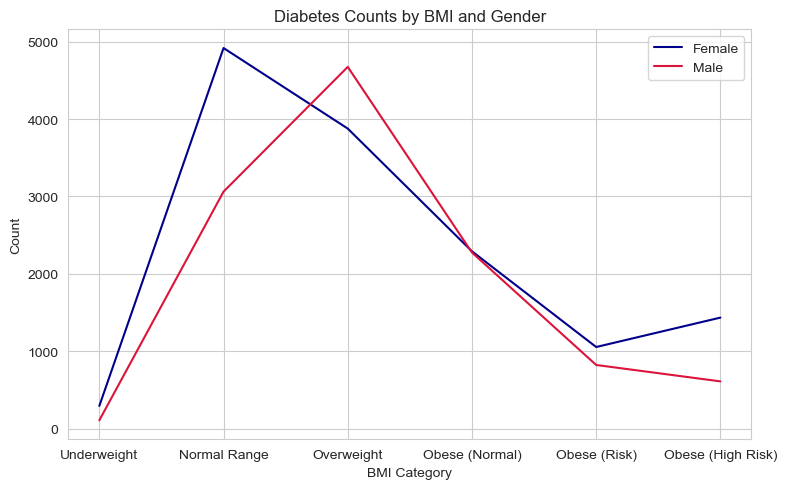

In [362]:
bmi_0 = d_o[d_o['BMI'] < 1850] # 저체중
bmi_1 = d_o[(d_o['BMI'] >= 1850) & (d_o['BMI'] <= 2499)] # 정상 범위
bmi_2 = d_o[(d_o['BMI'] >= 2500) & (d_o['BMI'] < 3000)] # 과체중 (비만 전 단계)
bmi_3 = d_o[(d_o['BMI'] >= 3000) & (d_o['BMI'] <= 3499)] # 비만(보통)
bmi_4 = d_o[(d_o['BMI'] >= 3500) & (d_o['BMI'] <= 3999)] # 비만(위험)
bmi_5 = d_o[d_o['BMI'] > 4000] # 비만(위험)
bmi_ranges = [
    ('Underweight', bmi_0),
    ('Normal Range', bmi_1),
    ('Overweight', bmi_2),
    ('Obese (Normal)', bmi_3),
    ('Obese (Risk)', bmi_4),
    ('Obese (High Risk)', bmi_5)
]

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Create a new column 'BMI_Category' in df_a_1
d_o['BMI_Category'] = pd.cut(d_o['BMI'], bins=[-float('inf'), 1850, 2499, 2999, 3499, 3999, float('inf')],
                                labels=['Underweight', 'Normal Range', 'Overweight', 'Obese (Normal)', 'Obese (Risk)', 'Obese (High Risk)'])

# BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
bmi_counts = d_o.groupby(['BMI_Category', 'SEX']).size().unstack().reset_index()

# 남성과 여성의 당뇨병 발병 횟수를 따로 그림
sns.lineplot(data=bmi_counts, x='BMI_Category', y=2, color='#00008B', label='Female')
sns.lineplot(data=bmi_counts, x='BMI_Category', y=1, color='#DC143C', label='Male')

# 제목과 레이블 추가
plt.title('Diabetes Counts by BMI and Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')

plt.legend()
plt.tight_layout()
# plt.savefig('top3_diabetes_bmi_당뇨.png')
plt.show()

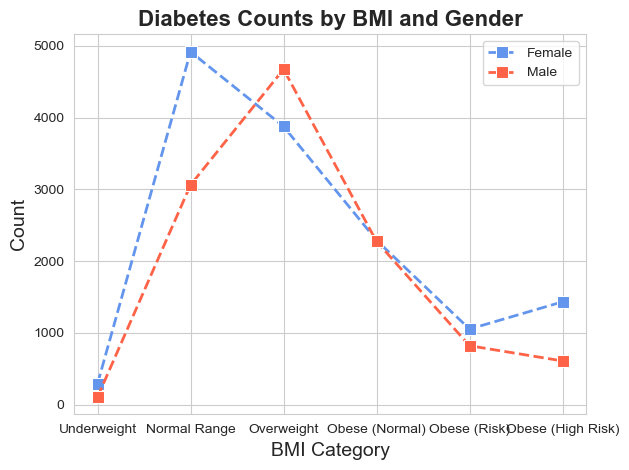

In [289]:
bmi_0 = d_o[d_o['BMI'] < 1850] # 저체중
bmi_1 = d_o[(d_o['BMI'] >= 1850) & (d_o['BMI'] <= 2499)] # 정상 범위
bmi_2 = d_o[(d_o['BMI'] >= 2500) & (d_o['BMI'] < 3000)] # 과체중 (비만 전 단계)
bmi_3 = d_o[(d_o['BMI'] >= 3000) & (d_o['BMI'] <= 3499)] # 비만(보통)
bmi_4 = d_o[(d_o['BMI'] >= 3500) & (d_o['BMI'] <= 3999)] # 비만(위험)
bmi_5 = d_o[d_o['BMI'] > 4000] # 비만(위험)
bmi_ranges = [
    ('Underweight', bmi_0),
    ('Normal Range', bmi_1),
    ('Overweight', bmi_2),
    ('Obese (Normal)', bmi_3),
    ('Obese (Risk)', bmi_4),
    ('Obese (High Risk)', bmi_5)
]

# Create a new column 'BMI_Category' in df_a_1
d_o['BMI_Category'] = pd.cut(d_o['BMI'], bins=[-float('inf'), 1850, 2499, 2999, 3499, 3999, float('inf')],
                                labels=['Underweight', 'Normal Range', 'Overweight', 'Obese (Normal)', 'Obese (Risk)', 'Obese (High Risk)'])

# BMI 범위 및 성별에 따른 당뇨병 발병 횟수를 집계한 새로운 DataFrame 생성
bmi_counts = d_o.groupby(['BMI_Category', 'SEX']).size().unstack().reset_index()

# 남성과 여성의 당뇨병 발병 횟수를 따로 그림
sns.lineplot(data=bmi_counts, x='BMI_Category', y=2, marker='s', markersize=8, color='#6495ED', label='Female', linestyle='--', linewidth=2)
sns.lineplot(data=bmi_counts, x='BMI_Category', y=1, marker='s', markersize=8, color='#FF6347', label='Male', linestyle='--', linewidth=2)

# 제목과 레이블 추가
plt.title('Diabetes Counts by BMI and Gender', fontsize=16, fontweight='bold')
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 범례 위치 조정
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('diabetes_counts_bmi_gender.png')
plt.show()

In [220]:
# 암
df_cnkind = df[['SEX','AGE_P','DIBEV1',
                'CNKIND1','CNKIND2','CNKIND3','CNKIND4','CNKIND5','CNKIND6','CNKIND7','CNKIND8','CNKIND9','CNKIND10',
                'CNKIND11','CNKIND12','CNKIND13','CNKIND14','CNKIND15','CNKIND16','CNKIND17','CNKIND18','CNKIND19','CNKIND20',
                'CNKIND21','CNKIND22','CNKIND23','CNKIND24','CNKIND25','CNKIND26','CNKIND27','CNKIND28','CNKIND29','CNKIND30']]
df_cnkind = df_cnkind.fillna(0) # nan 값을 0으로 변경
df_cnkind_o = df_cnkind[df_cnkind['DIBEV1'] == 1] # 당뇨병 o
df_cnkind_x = df_cnkind[df_cnkind['DIBEV1'] == 2] # 당뇨병 x

In [221]:
cnkind_list = ['CNKIND1','CNKIND2','CNKIND3','CNKIND4','CNKIND5','CNKIND6','CNKIND7','CNKIND8','CNKIND9','CNKIND10',
               'CNKIND11','CNKIND12','CNKIND13','CNKIND14','CNKIND15','CNKIND16','CNKIND17','CNKIND18','CNKIND19','CNKIND20',
               'CNKIND21','CNKIND22','CNKIND23','CNKIND24','CNKIND25','CNKIND26','CNKIND27','CNKIND28','CNKIND29','CNKIND30']

# df_d_o['ANGEV'] = df_d_o['ANGEV'].apply(lambda x: 2 if x not in [1, 2] else x)
for column in cnkind_list:
    df_cnkind_o[column] = df_cnkind_o[column].apply(lambda x: 2 if x not in [1, 2] else x)

In [222]:
cnkind_list = ['CNKIND1','CNKIND2','CNKIND3','CNKIND4','CNKIND5','CNKIND6','CNKIND7','CNKIND8','CNKIND9','CNKIND10',
               'CNKIND11','CNKIND12','CNKIND13','CNKIND14','CNKIND15','CNKIND16','CNKIND17','CNKIND18','CNKIND19','CNKIND20',
               'CNKIND21','CNKIND22','CNKIND23','CNKIND24','CNKIND25','CNKIND26','CNKIND27','CNKIND28','CNKIND29','CNKIND30']

cnkind_list_kor = ['방광','혈액','뼈','뇌','유방','자궁경부','대장','식도','쓸개','신장',
                   '후두','백혈병','간','폐','림프종','흑색종','입/혀/입술','난소','췌장','전립선',
                   '직장','피부(비흑생종)','피부(흑생종)','연조직','위','고환','인두','갑상선','자궁','기타암']

cnkind_list_eng = ['Bladder','Blood','Bone','Brain','Breast','Cervix', 'Colon', 'Esophagus', 'Gallbladder', 'Kidney', 
                   'larynx-windpipe', 'Leukemia', 'Liver', 'Lung', 'Lymphoma', 'Melanoma', 'mouth/tongue/lip', 'Ovary', 'Pancreas', 'Prostate', 
                   'Rectum', 'skin(non-melanoma)', 'skin(DKkind)', 'soft tissue(muscle orfat)', 'Stomach', 'Testis', 'throat-pharynx', 'Thyroid',
                   'Uterus', 'Other']

cnkind_sum = []
cnkind_list_values = []

for i in cnkind_list:
    d = (df_cnkind_o[f'{i}'] == 1).sum()
    cnkind_sum.append(d)
    cnkind_list_values.append(i)

cnkind_o1 = pd.DataFrame(list(zip(cnkind_sum, cnkind_list_values, cnkind_list_eng)), columns=['cnkind_sum', 'cnkind_list', 'cnkind_list_eng'])
cnkind_o1

,cnkind_sum,cnkind_list,cnkind_list_eng
0,17,CNKIND1,Bladder
1,0,CNKIND2,Blood
2,4,CNKIND3,Bone
3,2,CNKIND4,Brain
4,115,CNKIND5,Breast
5,21,CNKIND6,Cervix
6,35,CNKIND7,Colon
7,4,CNKIND8,Esophagus
8,0,CNKIND9,Gallbladder
9,15,CNKIND10,Kidney


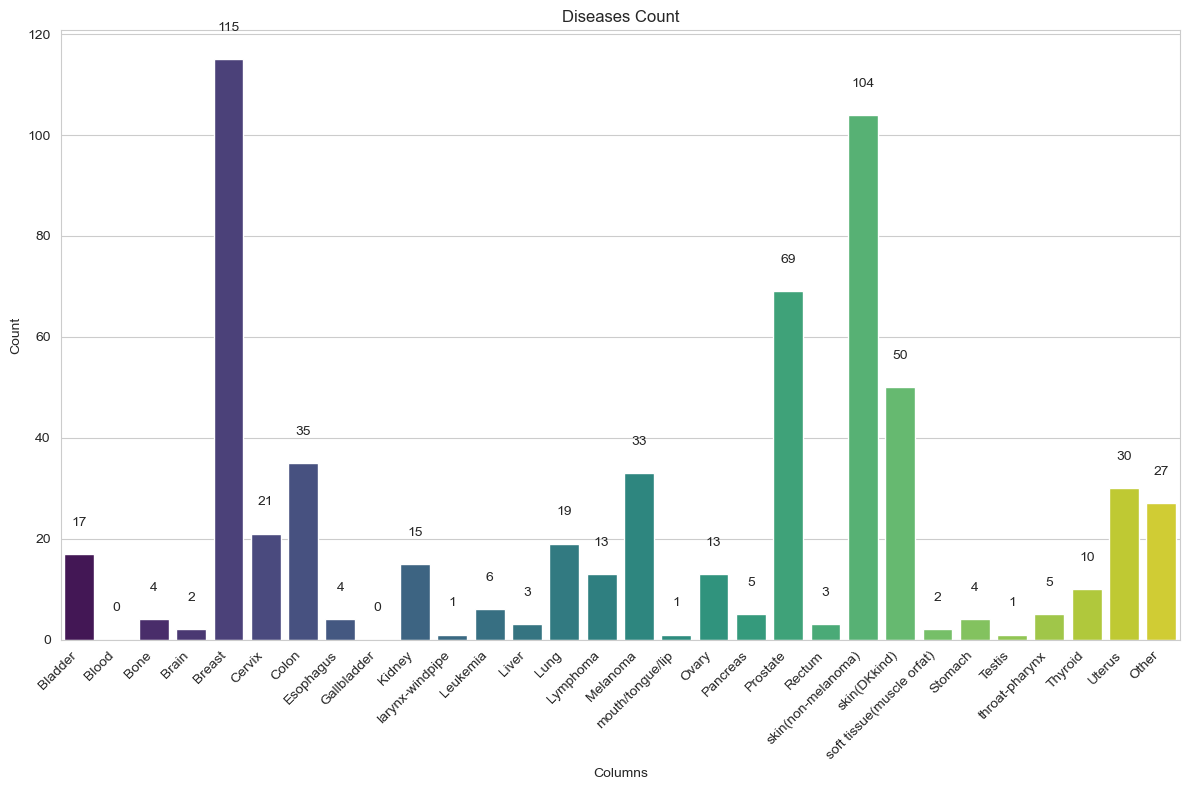

In [231]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Seaborn의 barplot 사용
sns.barplot(data=cnkind_o1, x='cnkind_list_eng', y='cnkind_sum', palette='viridis')

plt.title('Diseases Count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 그래프 위에 표시되는 값 추가
for idx, value in enumerate(cnkind_o1['cnkind_sum']):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
# plt.savefig('cancer_count.png')
plt.show()